In [1]:
import os
# 为 jupter notebook 设置系统代理
# 否则可能无法连接到huggingface
proxy = 'http://192.168.50.182:7890'
os.environ['http_proxy'] = proxy
os.environ['HTTP_PROXY'] = proxy
os.environ['https_proxy'] = proxy
os.environ['HTTPS_PROXY'] = proxy

import torch
from tqdm import tqdm
print(torch.cuda.is_available(), torch.cuda.device_count())

True 2


In [2]:
from sentence_transformers import SentenceTransformer  # https://www.sbert.net/
import numpy as np

# 使用时会自动下载所需要的模型.  
# https://huggingface.co/BAAI/bge-large-en-v1.5
model = SentenceTransformer('BAAI/bge-large-en-v1.5', device='cuda')

def embedding(texts: list[str]) -> np.ndarray:
    """
    embedding获得text的list,
    并将每一个text进行embedding操作,
    返回每一个text的embedding结果.
    """
    embeddings = model.encode(texts, normalize_embeddings=True)
    return embeddings

def calculateSimilarity(a:np.ndarray, b:np.ndarray) -> np.ndarray:
    """
    计算两个embedding结果之间的相似度,以ndarray的形式输入,返回一个矩阵,表明其之间的相似度
    """
    return a @ b.T

/home/tenghao/miniconda3/envs/ai-town/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# 测试样例.
# 在python 3.9.18 版本上能够成功使用.
text1 = ['sample1', 'sample2']
text2 = ['sample3', 'sample4']
embedding1 = embedding(text1)
embedding2 = embedding(text2)
print(embedding1)
print(embedding1 @ embedding2.T)

[[ 0.01565036  0.03648353  0.01993616 ... -0.00103825 -0.00561563
  -0.03185157]
 [ 0.00716442  0.04983098  0.04704395 ... -0.02127948 -0.0060233
  -0.01915273]]
[[0.8282864  0.833615  ]
 [0.8557756  0.85415757]]


In [3]:
# 取出top点的text内容
top_text = "LIVE FACT-CHECK: Clinton is right, Trump encouraged Japan to get a nuclear weapon. Mostly true."

top_extra_text = """
Hillary Clinton says Donald Trump argued U.S. should 'encourage' Japan to get nuclear weapons
During a high-profile foreign policy speech, Democratic presidential candidate Hillary Clinton repeated a series of past statements by Donald Trump to show that her Republican rival poses risks for international relations.

One of these past statements by Trump involved whether Japan should become a nuclear-armed state.
"It's no small thing when he suggests that America should withdraw our military support for Japan, encourage them to get nuclear weapons," Clinton said in her June 2, 2016, speech. 

Is Clinton correct that Trump encouraged Japan to get nuclear weapons?

What Trump has said

As we noted earlier, Clinton’s evidence includes interviews and comments Trump has made on the campaign trail.

When Trump sat for a March 26 interview with the New York Times, he was asked directly, "Would you object if (Japan) got their own nuclear arsenal, given the threat that they face from North Korea and China?"

Trump responded in part, "There’ll be a point at which we’re just not going to be able to do it anymore. Now, does that mean nuclear? It could mean nuclear. It’s a very scary nuclear world. Biggest problem, to me, in the world, is nuclear, and proliferation. At the same time, you know, we’re a country that doesn’t have money."

Let’s set aside Trump’s internal inconsistency -- saying that Japan might need nuclear weapons, and then, just seconds later, saying that the world’s "biggest problem" is nuclear proliferation.

If you read his words closely, Trump didn’t quite say he was encouraging Japan to get nuclear weapons, but he did go right up to the line. He was leaving the option on the table.

Having seen Trump’s comments to the New York Times, CNN’s Anderson Cooper asked him about it in a CNN town hall in Milwaukee on March 29.

Answering Cooper’s question about breaking with Japan’s non-nuclear stance, Trump said, "At some point we have to say, you know what, we're better off if Japan protects itself against this maniac in North Korea."

In fact, during the town hall, Cooper gave Trump multiple opportunities to back off his suggestion that Japan may need nuclear weapons, but Trump never did. He said, in succession, "maybe it's going to have to be time to change," "at some point we have to say, you know what, we're better off," "it's going to happen, anyway," and "wouldn't you rather in a certain sense have Japan have nuclear weapons?"
"""

low_text = """
LIVE FACT-CHECK: Clinton says Trump’s tax plan overwhelmingly helps the wealthy. True, experts say. True.
"""

low_extra_text = """
LIVE FACT-CHECK: Clinton says Trump’s tax plan overwhelmingly helps the wealthy. True, experts say. True.
With a backdrop of leaked lewd comments and Bill Clinton’s alleged sexual misconduct, you may not necessarily remember what Donald Trump and Hillary Clinton said about tax policy in the deeply personal and nasty Oct. 9 presidential debate.

When Trump touted his proposal to deliver tax cuts for all, Clinton pointed out that his tax plan would help millionaires and billionaires like himself the most.

"His plan will give the wealthy and corporations the biggest tax cuts they’ve ever had, more than the Bush tax cuts by at least a factor of two," Clinton said. "Donald always takes care of Donald and people like Donald, and this would be a massive gift."

Is Clinton right that the wealthy would benefit from Trump’s tax plan twice as much as they did under the Bush tax cuts?

The Clinton campaign told us their data comes from an analysis by the conservative Tax Foundation and the left-leaning Center on Budget and Policy Priorities on after-tax incomes of the top 1 percent. We also looked at the share of tax relief received by the top 1 percent as a percentage of GDP.

The evidence shows Clinton is right.

The Bush tax cuts

As a refresher, the Bush tax cuts, enacted under President George W. Bush in 2001 and 2003,  reduced the then-top marginal tax rate of 39.6 percent rate to 35 percent, the 36 percent rate to 33 percent, and so forth.

The left-leaning Center on Budget and Policy Priorities estimated that the Bush cuts increased the after-tax income of the top 1 percent between 5.3 percent and 6.7 percent from 2004 to 2012 (tax rates for high-income earners were raised the following year).

Altogether, the top 1 percent received a cut equivalent to about 0.66 percent of GDP (the Bush tax cuts were altogether 2.4 percent of GDP, while the top 1 percent received 27.5 percent of the cuts.)  

Trump’s plan

Trump’s plan would increase after-tax incomes of the wealthy between 10.2 to 19.9 percent, according to the Tax Foundation, and deliver a tax cut equivalent to about 1.32 percent of GDP.

Two key provisions in Trump’s latest tax plan, released September 2016, are particularly relevant to this fact-check.

First, Trump would collapse the current seven tax brackets into four, reducing the current top marginal income tax rate of 39.6 percent to 33 percent. (His previous tax plan called for a top marginal rate of 25 percent.)

"""


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# df_texts = pd.read_csv('user_3media_retweet_texts[time=16.10.10-16.12.19][lang=en].csv')

# texts = df_texts.text.to_list()
# names = df_texts['author.username'].to_list()
# print(names[0:3])

In [34]:
top_users = pd.read_csv('high.csv',index_col=0).Id.to_list()
top_users[0:5]

['Synnamenapple', 'NanaGump1975', 'CKCStrong', 'Katipunerx', 'boopumpkins']

In [5]:
def usertexts_embeddding(user_path:str, all_data_path:str, topic:str) :
    topic_embedding = embedding([topic])
    df_all_texts = pd.read_csv(all_data_path)
    all_texts = df_all_texts.text.to_list()
    all_names = df_all_texts['author.username'].to_list()

    point_users = pd.read_csv(user_path,index_col=0).Id.to_list()

    users, usertexts = [] ,[]
    for i in range(len(point_users)):
        for j in range(len(all_names)):
            if point_users[i] == all_names[j]:
                users.append(point_users[i])
                usertexts.append(all_texts[j])
                break
                
    userembeddings = embedding(usertexts)
    similarity = calculateSimilarity(userembeddings, topic_embedding)
    plt.title(all_data_path)
    plt.hist(similarity)
    
    return users, usertexts, userembeddings


In [6]:
# 对全部数据集来尝试做一次这样的结果
# all_texts

def alltexts_embedding(all_text_path:str, topics:list[str]):
    df_all_texts = pd.read_csv(all_text_path)
    all_texts = df_all_texts.text.to_list()
    all_names = df_all_texts['author.username'].to_list()

    alltexts_embedding = embedding(all_texts)
    topics_embedding = embedding(topics)
    similarity = calculateSimilarity(alltexts_embedding,topics_embedding)
    plt.title('all_texts_embedding')
    for i in similarity:
        plt.hist(i)

In [7]:
def alltexts_embedding_batches(all_text_path:str, topics:list[str]):
    df_all_texts = pd.read_csv(all_text_path)
    all_texts = df_all_texts.text.to_list()
    
    # 将其拆分为100个子数组
    texts_batches = np.array_split(all_texts, 100)
    # 为了这个进度条?
    texts_batches = tqdm(texts_batches)
    all_texts_embedding = []
    for batch in texts_batches:
        batch_embedding = embedding(batch)
        all_texts_embedding += batch_embedding.tolist()

    all_texts_embedding = np.array(all_texts_embedding)
    topics_embedding = embedding(topics)
    similarity = calculateSimilarity(all_texts_embedding,topics_embedding)
    return similarity

In [8]:
topics = [top_text, top_extra_text, low_text, low_extra_text]
path = 'user_3media_retweet_texts[time=16.10.10-16.12.19][lang=en].csv'
# 每个人关于这四个主题的关联度
similarity = alltexts_embedding_batches(path, topics)

100%|██████████| 100/100 [04:24<00:00,  2.65s/it]


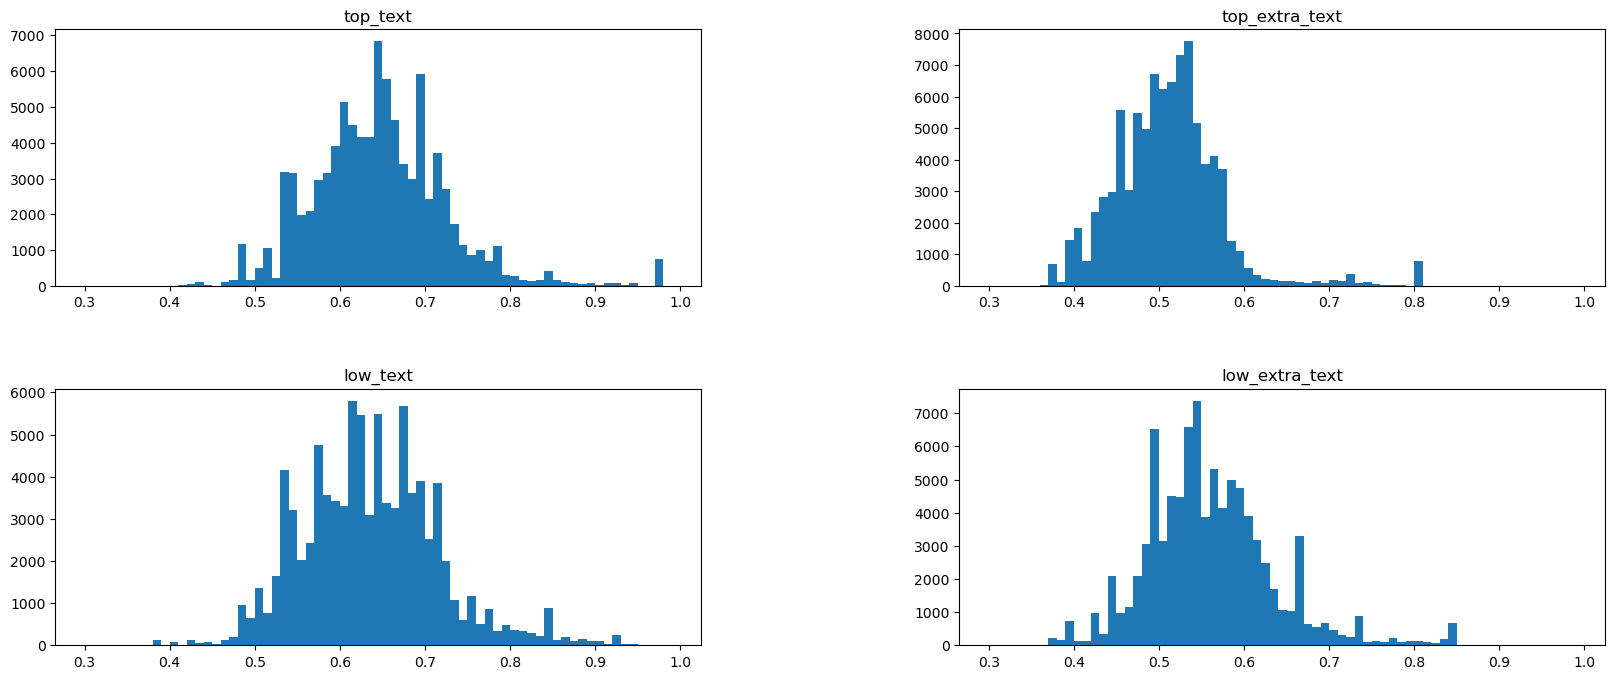

In [47]:
fig = plt.figure(figsize=(20,8))
title = ['top_text','top_extra_text','low_text','low_extra_text']
fig.subplots_adjust(hspace=0.4, wspace=0.4)
bins = [i for i in np.arange(0.3,1,0.01)]

for i in range(len(similarity.T)):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(title[i])
    ax.hist(similarity.T[i],bins)


(['Synnamenapple',
  'NanaGump1975',
  'CKCStrong',
  'boopumpkins',
  'k18c79',
  'JonathanL58',
  'NotJesseBrdford',
  'LindsDeRossett',
  'Ponydrivers',
  'S0SOMAR',
  'MsTiffPappion',
  'cheekyshiks',
  'TVPopFizz',
  'dls2015',
  'myamadakg',
  'squeeezeme',
  'tocochin73',
  'alcasgraham',
  'LarryHerrmann',
  'Sevenfold747',
  'Bemmuh',
  'sarbear54',
  'heyshaw',
  'tavonia28',
  'FAHODGSON1',
  'sneakerlifeshop',
  'jfp128',
  'snarkbat',
  'RIDemParty',
  'anime_brother',
  'Dking002',
  'michaelduarte79',
  'nicholasofpain',
  'RN_Atheist',
  'xitsbreezy',
  '3Lions22',
  'DolanLawGroup',
  'Pawprince102',
  'HoosierMomba',
  'ezzykul',
  'KyDems',
  'lensofmoonlight',
  'kimnkids37',
  'osbeachwalker',
  'lynnrahh',
  'sage4747',
  'Garnet_2203',
  'kjpstorm',
  'calibeach23',
  'IKare1',
  'SailingCarol',
  'doctormom333',
  'MathisNCNW',
  'QuengaSD',
  'jackandjill0522',
  'emmah12321',
  'Denise_W63',
  'Rue89_Chinatown',
  'MBax11',
  'OregonsFan',
  'kvndvddmy',
  'Do

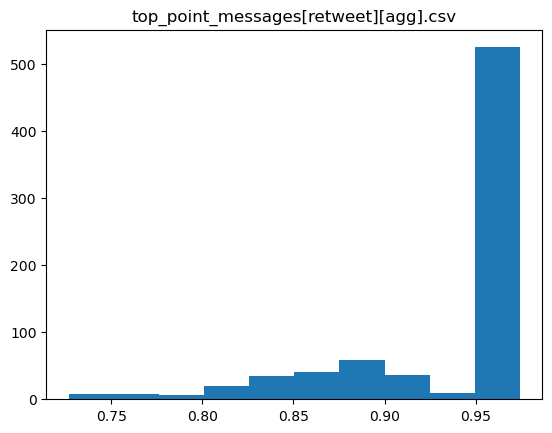

In [8]:
usertexts_embeddding('high.csv','top_point_messages[retweet][agg].csv', top_text)
# 解释一下现在的这个现象
# embedding产生的结果与文本高度相关
# 因为存在相当大一部分人,其转推也只有一条,即该条本身
# 那么其返回的结果也相对非常的准确
# 这里我们筛出去的可能只是embedding较小的人群的结果
# 因为对数据做agg后做embedding的本身会稀释这个关联性.
# 但不会稀释主题关联性,应该?

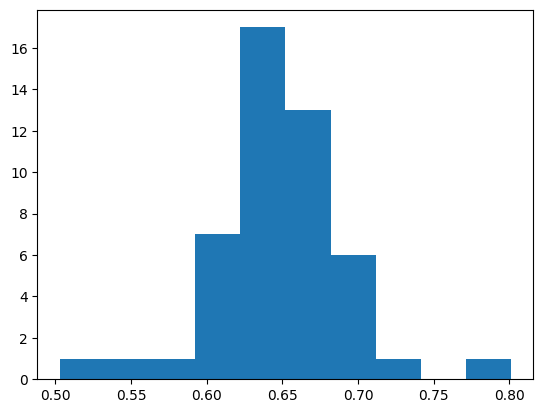

In [44]:
usertexts_embeddding('high.csv','top_point_messages[reply-quote][agg].csv', top_text)
# 这里只使用了reply和quote来进行划分,

(array([  1.,   4.,   8.,   1.,   2.,   0.,   4.,   4.,   1., 749.]),
 array([0.62512642, 0.6600368 , 0.69494724, 0.72985768, 0.76476806,
        0.79967844, 0.83458889, 0.86949933, 0.90440971, 0.93932009,
        0.97423053]),
 <BarContainer object of 10 artists>)

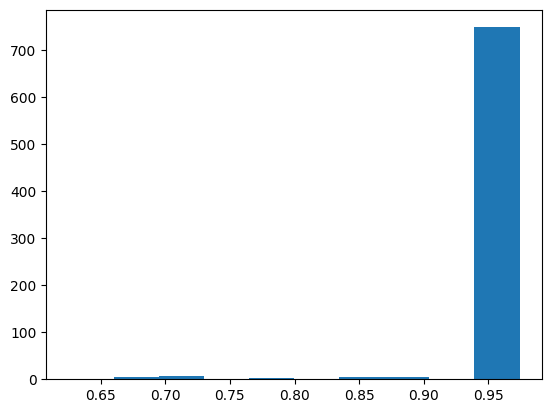

In [40]:
# 仅用retweet做出的结果

(['WisDems',
  'PhilipShulman',
  'schulz_kat',
  'DrewInGeorgia',
  'PplsAction',
  'amberSburgess',
  'lelandroy',
  'JohnRMoffitt',
  'MartinWashi',
  'nancyw23',
  'frankmalone110',
  'GaiaLibra',
  'BeelerGinger',
  'RachelCoyleOhio',
  'RevRaymondCB',
  'joeylamorte',
  'lizaj',
  'LeftStandingUp',
  'wench25',
  'kennedy81857',
  'Jasamgurlie',
  'KCCT',
  '19kfish',
  'sparriemcclary',
  'tvandwine',
  'Harry_Fotoman',
  'HomewardBounder',
  'glaukommatos',
  'MaLoRoMa',
  'TYoungRude',
  'melkleingraz',
  'JRBuckley',
  'kerman_d',
  'bupton57',
  'TimberWolff2',
  'Ben_Orner',
  'phonciplebone',
  'PinkGranite',
  'FIRM_Action',
  'ExGOPer',
  'RevChuckCurrie',
  'codyrodriguez',
  'Whitless256',
  'KatieSherrod3',
  'thomas_teague',
  'HSHToria',
  'calvinjuarez',
  'Balanced_Info',
  'mimita119',
  'ZigSmash',
  '6x6pix',
  'IamMrUnlimited',
  'MurphyonS'],
 ['fact check: donald trump did in fact support the iraq war #debates #debatenight \nfact check: under donald trump, a

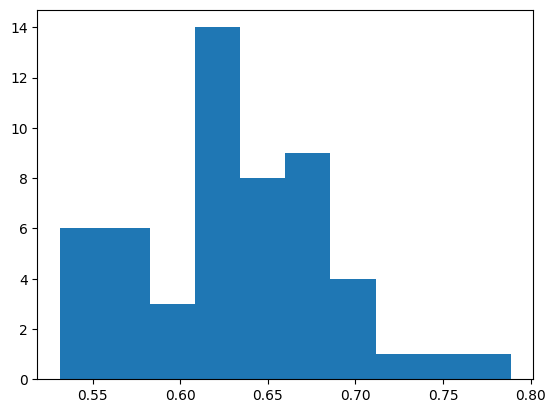

In [50]:
usertexts_embeddding('low.csv','low_point_messages[reply-quote][agg].csv',low_text )

(['WisDems',
  'PhilipShulman',
  'chromacruz',
  'Kelly8175',
  'JohnZucchero',
  'ohyoda',
  'atarheelchick',
  'LovetheSmartOne',
  'birdmangroup',
  'Tmiller0727',
  'jmreycroft',
  'Loca4AEI',
  'vietnah99',
  'jupiter_rizing',
  'aftlocal212',
  'rcolmn',
  'amyjayboyle',
  'scotthill996',
  'cantgetdone',
  'SheACumbination',
  'whorechata52',
  'Katielouisew31',
  'SStevenson521',
  'JulieGrolmus',
  'stephaniebogus',
  'schulz_kat',
  'rose_robin',
  'eylathes',
  'BillAlfano',
  'jedijesse96',
  'PatBurke799',
  'HelenNolen',
  'Shaunoon',
  'verostarcafe',
  'carlyboo41',
  'JeffreyTPotts',
  'kaseyyj',
  'DannyKrueger1',
  'CristytheQueen',
  'Salvatore_Greys',
  'craddy009',
  'Verycritical',
  'lerogue',
  'pixelknitter',
  'brookiet77',
  'bradisarobot',
  'MegsDreamDesign',
  'matthewmercer',
  'DrewInGeorgia',
  'ArchmageTolvan',
  'JarvisUnchained',
  'mata_33',
  'th3morningstars',
  'daday74',
  'lilred811',
  'ToaAxis',
  'Clrader246',
  '42believer',
  'sam1tron',

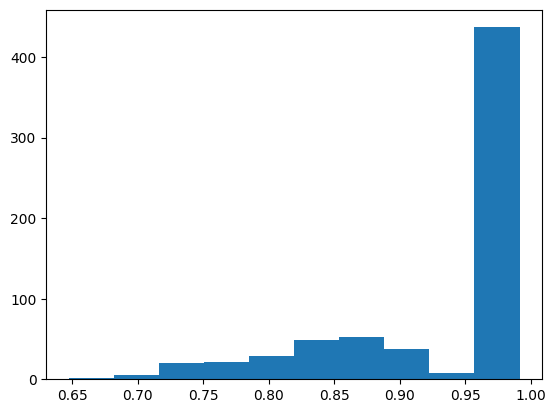

In [53]:
usertexts_embeddding('low.csv','low_point_messages[all][agg].csv',low_text )